# Search: Solving a Maze Using a Goal-based Agent

## Instructions

Total Points: Undergrads 100 / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a PDF file. 


## Introduction

The agent has a map of the maze it is in and the environment is assumed to be **deterministic, discrete, and known.** The agent must use the map to plan a path through the maze from the starting location $S$ to the goal location $G$.  This is a planing exercise for a goal-based agent, so you do not need to implement an environment, just use the map to search for a path. Once the plan is made, the agent in a deterministic environment (i.e., the transition function is deterministic with the outcome of each state/action pair fixed and no randomness) can just follow the path and does not need to care about the percepts.
This is also called an **[open-loop system](https://en.wikipedia.org/wiki/Open-loop_controller).**
The execution phase is trivial and we do not implement it in this exercise.

Tree search algorithm implementations that you find online and used in general algorithms courses have often a different aim. These algorithms assume that you already have a tree in memory. We are interested in dynamically creating a search tree with the aim of finding a good/the best path from the root noteto the goal state. Follow the pseudo code presented in the text book (and replicated in the slides) closely. Ideally, we would like to search only a small part of the maze, i.e., create a search tree with as few nodes as possible. 

Several mazes for this exercise are stored as text files. Here is the small example maze:

In [1]:
maze_str = []
maze_names = ['Small Maze',
    'Medium Maze',
    'Large Maze',
    'Open Maze',
    'Wall Maze',
    'Loops Maze',
    'Empty Maze',
    'Empty 2_Maze']

with open("small_maze.txt", "r") as f:
    maze_str.append(f.read())
with open("medium_maze.txt", "r") as f:
    maze_str.append(f.read())
with open("large_maze.txt", "r") as f:
    maze_str.append(f.read())
with open("open_maze.txt", "r") as f:
    maze_str.append(f.read())
with open("wall_maze.txt", "r") as f:
    maze_str.append(f.read())
with open("loops_maze.txt", "r") as f:
    maze_str.append(f.read())
with open("empty_maze.txt", "r") as f:
    maze_str.append(f.read())
with open("empty_2_maze.txt", "r") as f:
    maze_str.append(f.read())
#     maze_str = f.read()
print(maze_str[6])
type(maze_str[0])

# small maze,
# medium maze,
# large maze,
# open maze,
# wall maze,
# loops maze,
# empty maze, and
# empty 2_maze.

XXXXXXXXXXXX
X          X
X        G X
X          X
X          X
X          X
X          X
X          X
X          X
X S        X
X          X
XXXXXXXXXXXX



str

__Note:__ The mazes above contains cycles and therefore the state space may not form proper trees unless cycles are prevented. Therfore, you will need to deal with cycle detection in your code.

## Parsing and pretty printing the maze

The maze can also be displayed in color using code in the module [maze_helper.py](maze_helper.py). The code parses the string representing the maze and converts it into a `numpy` 2d array which you can use in your implementation. Position are represented as a 2-tuple of the form `(row, col)`. 

In [2]:
import maze_helper as mh

maze = mh.parse_maze(maze_str[0])

# look at a position in the maze by subsetting the 2d array
print("Position(0,0):", maze[0, 0])

# there is also a helper function called `look(maze, pos)` available
# which uses a 2-tuple for the position.
print("Position(8,1):", mh.look(maze, (8, 1)))

Position(0,0): X
Position(8,1): G


A helper function to visualize the maze is also available.

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# use higher resolution images in notebook

# mh.show_maze(maze)

Find the position of the start and the goal using the helper function `find_pos()`

In [4]:
print("Start location:", mh.find_pos(maze, what = "S"))
print("Goal location:", mh.find_pos(maze, what = "G"))

Start location: (3, 11)
Goal location: (8, 1)


Helper function documentation.

In [5]:
help(mh)

Help on module maze_helper:

NAME
    maze_helper

DESCRIPTION
    Code for the Maze Assignment by Michael Hahsler
    Usage: 
        import maze_helper as mh
        mh.show_some_mazes()

FUNCTIONS
    find_pos(maze, what='S')
        Find start/goal in a maze and returns the first one. 
        Caution: there is no error checking!
        
        Parameters:
        maze: a array with characters prodced by parse_maze()
        what: the letter to be found ('S' for start and 'G' for goal)
        
        Returns:
        a tupple (x, y) for the found position.
    
    look(maze, pos)
        Look at the label of a square with the position as an array of the form (x, y).
    
    parse_maze(maze_str)
        Convert a maze as a string into a 2d numpy array
    
    show_maze(maze, fontsize=10)
        Display a (parsed) maze as an image.
    
    welcome()
        Welcome message.

FILE
    /Users/colinweil/Library/CloudStorage/OneDrive-SouthernMethodistUniversity/AI/CS7320-AI/Sear

## Tree structure

Here is an implementation of the basic node structure for the search algorithms (see Fig 3.7 on page 73). I have added a method that extracts the path from the root node to the current node. It can be used to get the path when the search is completed.

In [6]:
class Node:
    def __init__(self, pos, parent, action, cost, h = 0):
        self.pos = tuple(pos)    # the state; positions are (row,col)
        self.parent = parent     # reference to parent node. None means root node.
        self.action = action     # action used in the transition function (root node has None)
        self.cost = cost         # for uniform cost this is the depth. It is also g(n) for A* search
        self.h = h

    def __str__(self):
        return f"Node - pos = {self.pos}; action = {self.action}; cost = {self.cost}"
    
    def get_path_from_root(self):
        """returns nodes on the path from the root to the current node."""
        node = self
        path = [node]
    
        while not node.parent is None:
            node = node.parent
            path.append(node)
        
        path.reverse()
        
        return(path)
    
    def __lt__(self, other):
        return self.h < other.h

If needed, then you can add more fields to the class like the heuristic value $h(n)$ or $f(n)$.

Examples for how to create and use a tree and information on memory management can be found [here](../Python_Code_Examples/trees.ipynb).

# Tasks

The goal is to:

1. Implement the following search algorithms for solving different mazes:

    - Breadth-first search (BFS)
    - Depth-first search (DFS)
    - Greedy best-first search (GBFS)
    - A* search

2. Run each of the above algorithms on the 
    - [small maze](small_maze.txt), 
    - [medium maze](medium_maze.txt), 
    - [large maze](large_maze.txt), 
    - [open maze](open_maze.txt),
    - [wall maze](wall_maze.txt),
    - [loops maze](loops_maze.txt),
    - [empty maze](empty_maze.txt), and
    - [empty 2_maze](empty_2_maze.txt).
    
3. For each problem instance and each search algorithm, report the following in a table:

    - The solution and its path cost
    - Total number of nodes expanded
    - Maximum tree depth
    - Maximum size of the frontier

4. Display each solution by marking every maze square (or state) visited and the squares on the final path.

## General [10 Points]

1. Make sure that you use the latest version of this notebook. Sync your forked repository and pull the latest revision. 
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement inteligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formated professionally. 
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your PDF file is readable. For example, long lines are cut off in the PDF file. You don't have control over page breaks, so do not worry about these.
4. Document your code. Add a short discussion of how your implementation works and your design choices.

## Task 1: Defining the search problem and determining the problem size [10 Points]

Define the components of the search problem:

* Initial state
* Actions
* Transition model
* Goal state
* Path cost

Use verbal descriptions, variables and equations as appropriate. 

*Note:* You can swich the next block from code to Markdown and use formating.

Initial state : The starting location in the maze. This is given by a coordinate.

Actions : Move Left, Right, Up, or Down

Transition model : If you move in any direction given by the action, then your coordinate will change in order to show that you have moved in that direction.

Goal state : To reach the end of the maze, which is given by the goal location (it is a coordinate).

Path cost : Sum of all actions made in order to get to the goal location (each action counts as 1 cost)

Give some estimates for the problem size:

* $n$: state space size
* $d$: depth of the optimal solution
* $m$: maximum depth of tree
* $b$: maximum branching factor

Describe how you would determin these values for a given maze.

Estimates for following:

𝑛 : state space size - The way to find space size is to see how many open coordinate positions there are in the maze (non-walls). This would be easy to calculate in the matrix because you could do a doulbe for loop to count how many white spaces there are. The worst possible case would be all white space so the State Space Size would be the number of x coordinates * the number of y coordinates.

𝑑 : depth of the optimal solution - The worst case of d would be walls on every other column so to solve the maze you would have to go up and down until you reach the exact opposite corner of where the start was in order to reach the goal. The worse possible optimal solution would be x*y/2 because half of the maze would be walls that you wouldn't travel through. Most of the time this will not be the case and d will much much smaller, especially when there are less walls in the maze. If the solution used does not account for infinite loops, then d could also be infinite if it gets caught in a loop.

𝑚 : maximum depth of tree - The worst case of m would be checking every single spot in the maze except the goal. This means that the worst case of m would be x*y-1. Unlike d, the less walls there are, the higher m goes because there is more locations for the solution to explore which causes the tree to get deeper.

𝑏 : maximum branching factor - The maximum of b will be 4 because the solution can only go up, down, left and right. If there are any walls around every location then the maximum branching factor will become lower. The easiest way to find the exact b on a maze would be to look at the intersections and see which intersection has the highest number of white spaces touching it.


## Task 2: Uninformed search: Breadth-first and depth-first [40 Points]

Implement these search strategies. Follow the pseudocode in the textbook/slides. You can use the tree structure shown above to extract the final path from your solution.

__Notes:__
* You can find maze solving implementations online that use the map to store information. While this is an effective idea for this two-dimensional navigation problem, it typically cannot be used for other search problems. Therefore, follow the textbook and only store information in the tree created during search, and use the `reached` and `frontier` data structures.
* DSF can be implemented using the BFS tree search algorithm and simply changing the order in which the frontier is expanded (this is equivalent to best-first search with path length as the criterion to expand the next node). However, to take advantage of the significantly smaller memory footprint of DFS, you need to implement DFS in a different way without a `reached` data structure and by releasing the memory for nodes that are not needed anymore. 
* If DFS does not use a `reached` data structure, then its cycle checking abilities are limited. Remember, that DSF is incomplete if cycles cannot be prevented. You will see in your experiments that open spaces are a problem.

In [7]:
# Helper Functions
import random
import copy
import queue

# Prints node in order from start to current node (goal)
def PrintAnswer(answer):
    if(answer == None):
        print('Path Not Found')
        return;
    for i in answer.get_path_from_root():
        print(i)
        
# Prints maze with path to goal found
def ShowAnswerOnMaze(maze,answer):
    if(answer == None):
        print('Path Not Found')
        return;
    m = maze.copy()
    path = answer.get_path_from_root()
    path = path[1:-1]
    for i in path:
        m[i.pos[0]][i.pos[1]] = 'P'
    mh.show_maze(m)

# Returns node of new location if it isn't wall
def ClassifyMove(maze, x, y, p, a, h):
    move = maze[x][y]
    if(move != 'X'):
        return Node((x,y), p, a, p.cost+1, h)
    return None
    
# Expands node in all directions possible and return list of nodes
def EXPAND(maze, node, addHeurisitic = False, Astar = False):
    s = node
    x = s.pos[0]
    y = s.pos[1]
    nextNodes = []
    nextNodes.append(ClassifyMove(maze, x-1, y, node, 'UP', GetHVal(maze,node,addHeurisitic,Astar) ))
    nextNodes.append(ClassifyMove(maze, x+1, y, node, 'DOWN', GetHVal(maze,node,addHeurisitic,Astar) ))
    nextNodes.append(ClassifyMove(maze, x, y-1, node, 'LEFT', GetHVal(maze,node,addHeurisitic,Astar) ))
    nextNodes.append(ClassifyMove(maze, x, y+1, node, 'RIGHT', GetHVal(maze,node,addHeurisitic,Astar) ))
    nextNodes = [value for value in nextNodes if value != None]
    random.shuffle(nextNodes)
        
    return nextNodes

# Returns the hueristic value for A* or GBS
def GetHVal(maze, node, addHeurisitic,Astar):
    if addHeurisitic:
        if Astar:
            goal = mh.find_pos(maze, what = "G")
            return node.cost + abs(goal[0] - node.pos[0]) + abs(goal[1] - node.pos[1])
        else:
            goal = mh.find_pos(maze, what = "G")
            return abs(goal[0] - node.pos[0]) + abs(goal[1] - node.pos[1])
        
    return 0
    

# Checks if there is a cycle in a node
def IsCycle(node):
    pos = node.pos
    parents = node.get_path_from_root()[:-1]
    for i in parents:
        if i.pos == pos:
            return True
    return False

# Finds the tree size of a node
def GetTreeSize(node):
    return len(node.get_path_from_root())
    

In [8]:
# BFS
import maze_helper as mh
          
def BFS(maze):
    numExpand = numMem = maxFront = 1

    start = mh.find_pos(maze, what = "S")
    goal = mh.find_pos(maze, what = "G")
    node = Node(start, None, None, 0)
    
    if(goal == start): return node
    
    frontier = queue.Queue()
    frontier.put(node)
    reached = [start]

    while not frontier.empty():
        if frontier.qsize() > maxFront: maxFront = frontier.qsize()
        node = frontier.get()
        if frontier.qsize() + len(reached) > numMem: 
            numMem = frontier.qsize()  + len(reached)
        numExpand += 1
        for s in EXPAND(maze, node):
            if(s.pos == goal): 
                return ([s.cost, numExpand + 1, GetTreeSize(s), numMem, maxFront], s)
            if s.pos not in reached:
                reached.append(s.pos)
                frontier.put(s)  
    return None

maze = mh.parse_maze(maze_str[3])
# mh.show_maze(maze)
%time answer = BFS(maze)
# PrintAnswer(answer)
# ShowAnswerOnMaze(maze, answer[1])
print(answer)

CPU times: user 36.5 ms, sys: 1.27 ms, total: 37.8 ms
Wall time: 36.8 ms
([54, 681, 55, 687, 25], <__main__.Node object at 0x7f7cb807eb80>)


In [9]:
## DFS
def DFS(maze):
    numExpand = treeDepth = numMem = maxFront = 1

    start = mh.find_pos(maze, what = "S")
    goal = mh.find_pos(maze, what = "G")
    node = Node(start, None, None, 0)
    
    frontier = [ node ]
    
    while frontier:
        if len(frontier) > maxFront: maxFront = len(frontier)
        node = frontier.pop()
        if len(frontier)+ GetTreeSize(node) > numMem: 
            numMem = len(frontier) + GetTreeSize(node)
        if GetTreeSize(node) > treeDepth: treeDepth = GetTreeSize(node)
        if(node.pos == goal): return ([node.cost, numExpand, treeDepth, numMem, maxFront], node)
        if not IsCycle(node):
            for s in EXPAND(maze, node):
                if not IsCycle(s):
                    numExpand += 1
                    for i in frontier:
                        if i.pos == s.pos:
                            frontier.remove(i)
                    frontier.append(s)
    return None

maze = mh.parse_maze(maze_str[3])
# mh.show_maze(maze)
%time answer = DFS(maze)
# PrintAnswer(answer)
# ShowAnswerOnMaze(maze, answer[1])
print(answer)

CPU times: user 87.1 ms, sys: 1.86 ms, total: 89 ms
Wall time: 88.2 ms
([278, 966, 279, 369, 101], <__main__.Node object at 0x7f7cd83e2310>)


How does BFS and DFS deal with loops (cycles)?

BFS - BFS uses a reached data structure where all nodes that have been expanded onto are stored. This means that if the same node is expanded again, it will not be added to the frontier or the reached data structures which avoids cycles.

DFS - DFS calls a method call IsCycle which checks if the node that is expanded onto is already on the singular branch of the tree. If the node is already in the tree, then it will not add the node to the frontier. Another way of preventing a cycle is after expansion, if the node is already present in the frontier, then it removes the node from the frontier and adds it back to the top of the stack. This makes sure that if the current path is not the one to the goal, then the algorithm will not pass over the same node that was in the frontier and go down the same wrong path.

Are your implementations complete and optimal? Explain why. What is the time and space complexity of each of **your** implementations?

BFS - Complete because it will explore the entire maze until it finds the answer. Optimal since the BFS algorithm expands one depth of the tree at a time, this mean that it will expand by the one cost at a time and all costs of the tree levels will be the same. It will expand the tree until one of the roots equals the goal and it is guarenteed to be the lowest cost because all lower cost paths will have already been explored. 
    Time Complexity: O(b^d)
    Space Complexity: O(b^d)


DFS - Complete because DFS will explore the whole maze before it finishes. It is not optimal because DFS will randomly pick the expanded path until it either finds the goal or reaches a dead end. It may snake around the goal and not have the optimal path because of the random factor and the possibility that it could start the wrong direction and end at the goal. 
    Time Complexity: O(b^m)
    Space Complexity: O(bm)

## Task 3: Informed search: Implement greedy best-first search and A* search  [20 Points]

You can use the map to estimate the distance from your current position to the goal using the Manhattan distance (see https://en.wikipedia.org/wiki/Taxicab_geometry) as a heuristic function. Both algorithms are based on Best-First search which requires only a small change from the BFS algorithm you have already implemented (see textbook/slides). 

In [10]:
# Helper functions
def IndexOfNodeInReached(reached, s):
    for i in reached:
        if(i.pos == s.pos):
            return reached.index(i)
    return -1

In [11]:
# GBS
from queue import PriorityQueue

def GBS(maze):
    numExpand = treeDepth = numMem = maxFront = 1

    start = mh.find_pos(maze, what = "S")
    goal = mh.find_pos(maze, what = "G")
    node = Node(start, None, None, 0)
        
    frontier = PriorityQueue()
    frontier.put(node)
    reached = [node]

    while not frontier.empty():
        if frontier.qsize() > maxFront: maxFront = frontier.qsize()
        node = frontier.get()
        if frontier.qsize()  + len(reached) > numMem: 
            numMem = frontier.qsize() + len(reached)
        if GetTreeSize(node) > treeDepth: treeDepth = GetTreeSize(node)
        if(node.pos == goal): return ([node.cost, numExpand, treeDepth, numMem, maxFront], node)
        numExpand += 1
        
        for s in EXPAND(maze, node, True):
            index = IndexOfNodeInReached(reached, s)
            if index == -1:
                reached.append(s)
                frontier.put(s)  
            elif s.cost < reached[index].cost:
                reached[index] = s
                frontier.put(s)  
    return None
    

maze = mh.parse_maze(maze_str[0])
# mh.show_maze(maze)
%time answer = GBS(maze)
# PrintAnswer(answer)
# ShowAnswerOnMaze(maze, answer[1])
print(answer)

CPU times: user 2.08 ms, sys: 80 µs, total: 2.16 ms
Wall time: 2.13 ms
([29, 41, 30, 49, 5], <__main__.Node object at 0x7f7cfa0114f0>)


In [12]:
### A*
def Astar(maze):
    numExpand = treeDepth = numMem = maxFront = 1

    start = mh.find_pos(maze, what = "S")
    goal = mh.find_pos(maze, what = "G")
    node = Node(start, None, None, 0, 0)
        
    frontier = PriorityQueue()
    frontier.put(node)
    reached = [node]

    while not frontier.empty():
        if frontier.qsize() > maxFront: maxFront = frontier.qsize()
        node = frontier.get()
        if frontier.qsize() + len(reached) > numMem: 
            numMem = frontier.qsize() + len(reached)
        if GetTreeSize(node) > treeDepth: treeDepth = GetTreeSize(node)
        if(node.pos == goal): return ([node.cost, numExpand, treeDepth, numMem, maxFront], node)
        numExpand += 1
        
        for s in EXPAND(maze, node, True, True):
            index = IndexOfNodeInReached(reached, s)
            if index == -1:
                reached.append(s)
                frontier.put(s)  
            elif s.h < reached[index].h:
                reached[index] = s
                frontier.put(s)  
    return None
    

maze = mh.parse_maze(maze_str[3])
# mh.show_maze(maze)
%time answer = Astar(maze)
# PrintAnswer(answer)
# ShowAnswerOnMaze(maze, answer[1])
print(answer)

CPU times: user 45 ms, sys: 1.52 ms, total: 46.5 ms
Wall time: 45.5 ms
([54, 295, 55, 457, 94], <__main__.Node object at 0x7f7cd83e4730>)


Are your implementations complete and optimal? What is the time and space complexity?

GBS - Complete but not optimal. Time & Space Complexity: O(bd)

A* - Complete and optimal. Time & Space Complexity: Number of nodes where the cost to get to the node plus Manhattan Distance to the goal ≤ 𝐶ost of optimal solution.


## Task 4: Comparison and discussion [20 Points] 

Run experiments to compare the implemented algorithms.

How to deal with issues:

* Your implementation returns unexpected results: Try to debug and fix the code. Visualizing the maze, the current path and the frontier after every step is very helpful. If the code still does not work, then mark the result with an asterisk (*) and describe the issue below the table.

* Your implementation cannot consistently solve a specific maze and ends up in an infinite loop:
    Debug. If it is a shortcoming of the algorithm/implementation, then put "N/A*" in the results table and describe why this is happening.

In [13]:
# Add code
import pandas as pd
dfss = []

for i in range(8):
    maze = mh.parse_maze(maze_str[i])
    bfs = BFS(maze)[0]
    dfs = DFS(maze)[0]
    gbs = GBS(maze)[0]
    a = Astar(maze)[0]

    print('\n','\033[1m' + maze_names[i])
    df = pd.DataFrame([bfs, dfs, gbs, a], columns=['path cost', 
            '# of nodes expanded', 
            'max tree depth',
            'max # of nodes in memory',
            'max frontier size'],
             index = ['BFS','DFS','GBS','A*'])
    dfss.append(df)
    display(df)
    


 Small Maze


,path cost,# of nodes expanded,max tree depth,max # of nodes in memory,max frontier size
BFS,19,92,20,93,8
DFS,19,82,39,44,7
GBS,29,44,30,54,6
A*,19,59,20,68,8



 Medium Maze


,path cost,# of nodes expanded,max tree depth,max # of nodes in memory,max frontier size
BFS,68,267,69,271,8
DFS,174,184,175,181,7
GBS,152,161,153,175,8
A*,68,229,69,240,8



 Large Maze


,path cost,# of nodes expanded,max tree depth,max # of nodes in memory,max frontier size
BFS,210,619,211,623,8
DFS,210,452,211,243,33
GBS,210,478,211,516,20
A*,210,557,211,571,12



 Open Maze


,path cost,# of nodes expanded,max tree depth,max # of nodes in memory,max frontier size
BFS,54,681,55,687,25
DFS,198,536,202,288,93
GBS,68,129,69,254,80
A*,54,311,55,430,77



 Wall Maze


,path cost,# of nodes expanded,max tree depth,max # of nodes in memory,max frontier size
BFS,14,86,15,91,10
DFS,30,72,35,51,21
GBS,18,27,19,75,25
A*,14,66,15,118,30



 Loops Maze


,path cost,# of nodes expanded,max tree depth,max # of nodes in memory,max frontier size
BFS,23,72,24,72,8
DFS,49,76,50,61,12
GBS,23,72,24,71,10
A*,23,63,24,69,8



 Empty Maze


,path cost,# of nodes expanded,max tree depth,max # of nodes in memory,max frontier size
BFS,14,94,15,98,12
DFS,28,69,29,49,21
GBS,14,18,15,62,23
A*,14,54,15,114,35



 Empty 2_Maze


,path cost,# of nodes expanded,max tree depth,max # of nodes in memory,max frontier size
BFS,14,93,15,99,12
DFS,46,116,47,72,26
GBS,14,20,15,72,27
A*,14,50,15,113,34


Present the results as using charts (see [Python Code Examples/charts and tables](../Python_Code_Examples/charts_and_tables.ipynb)). 

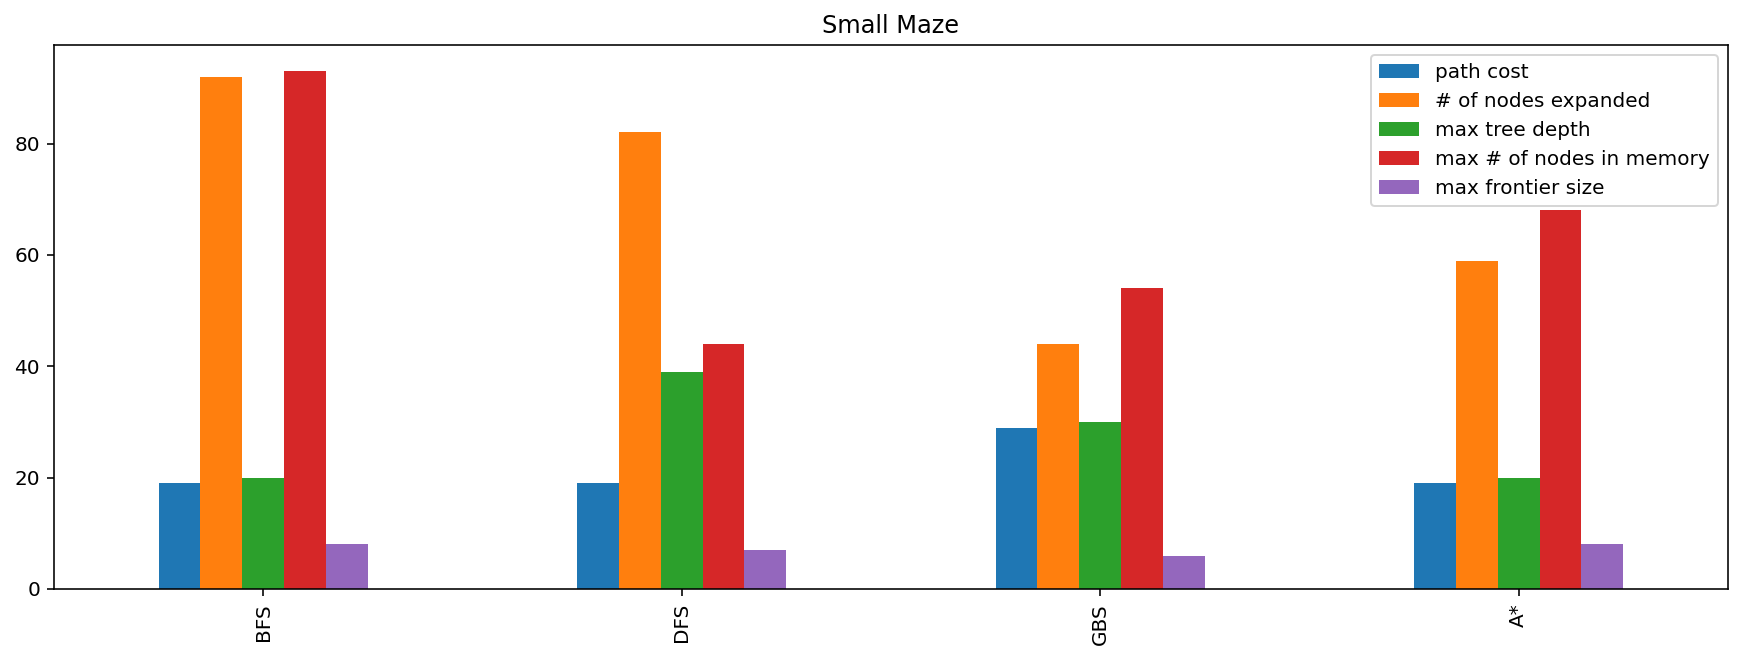

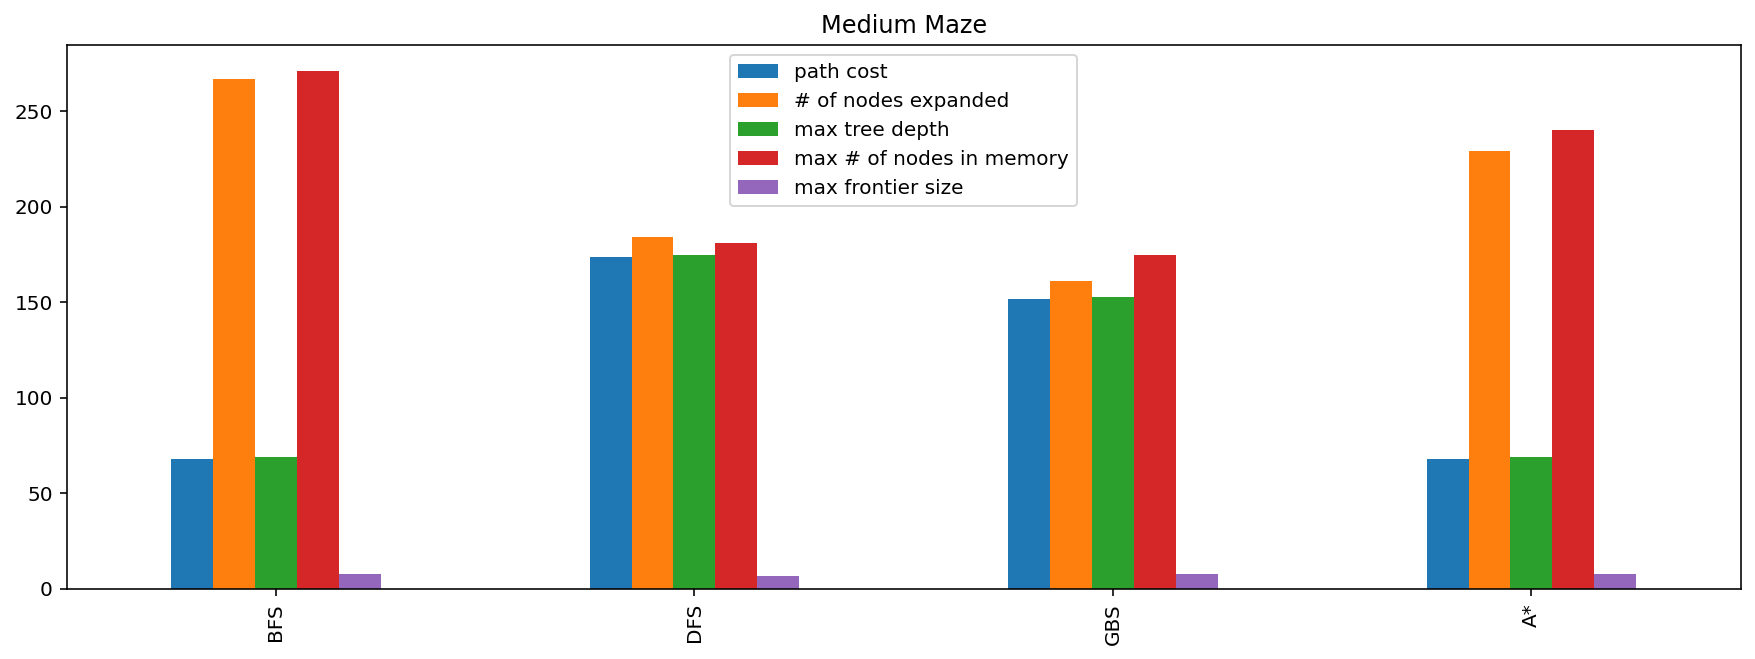

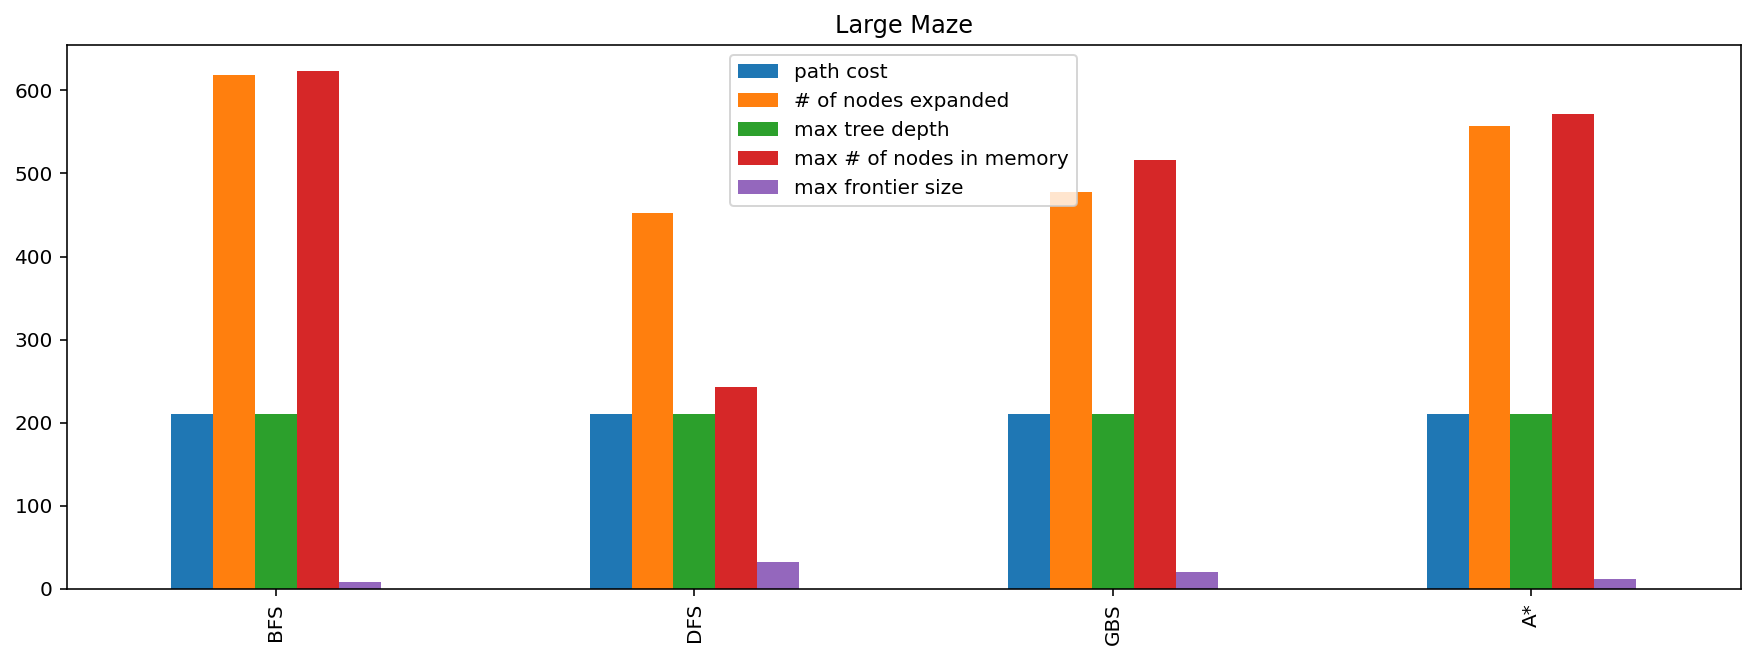

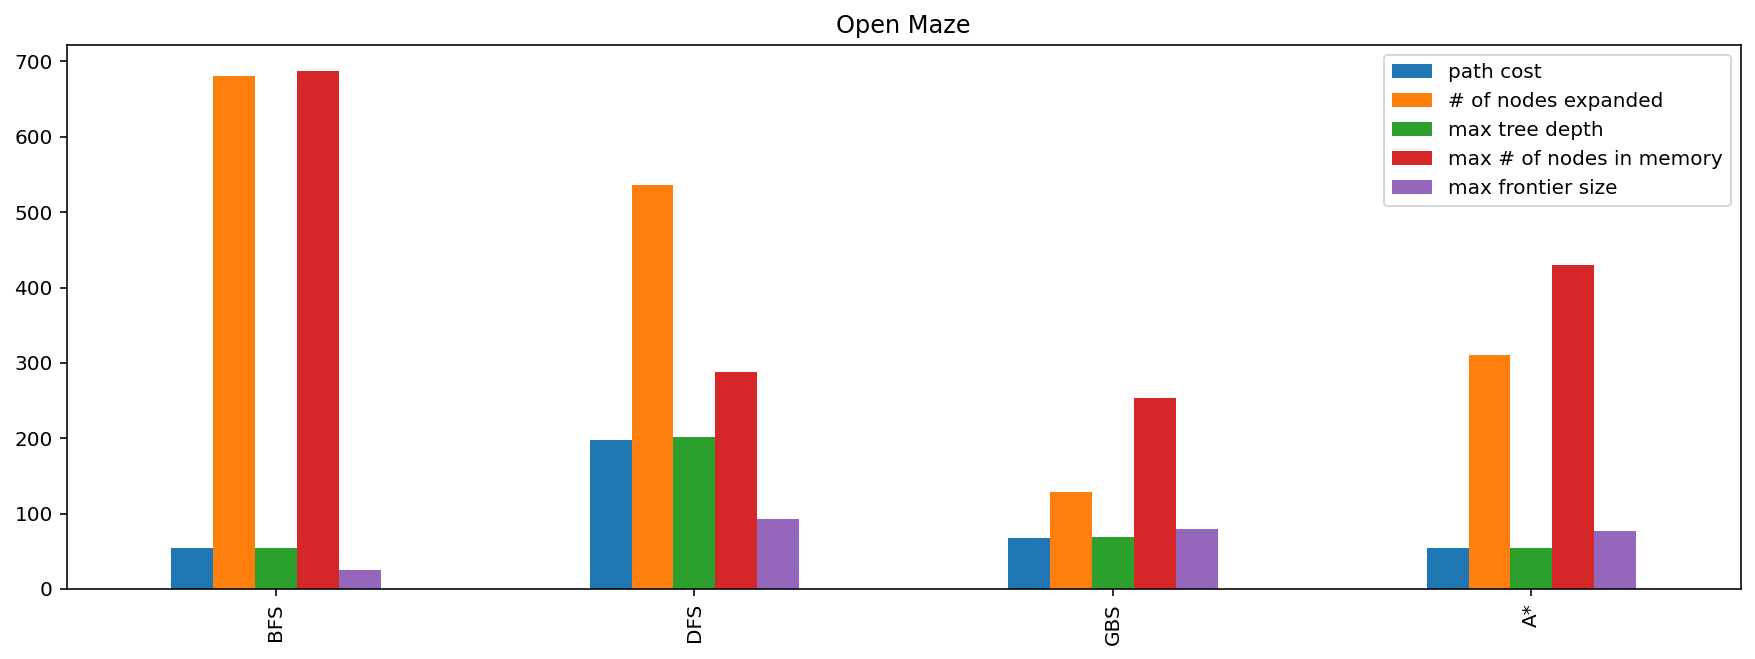

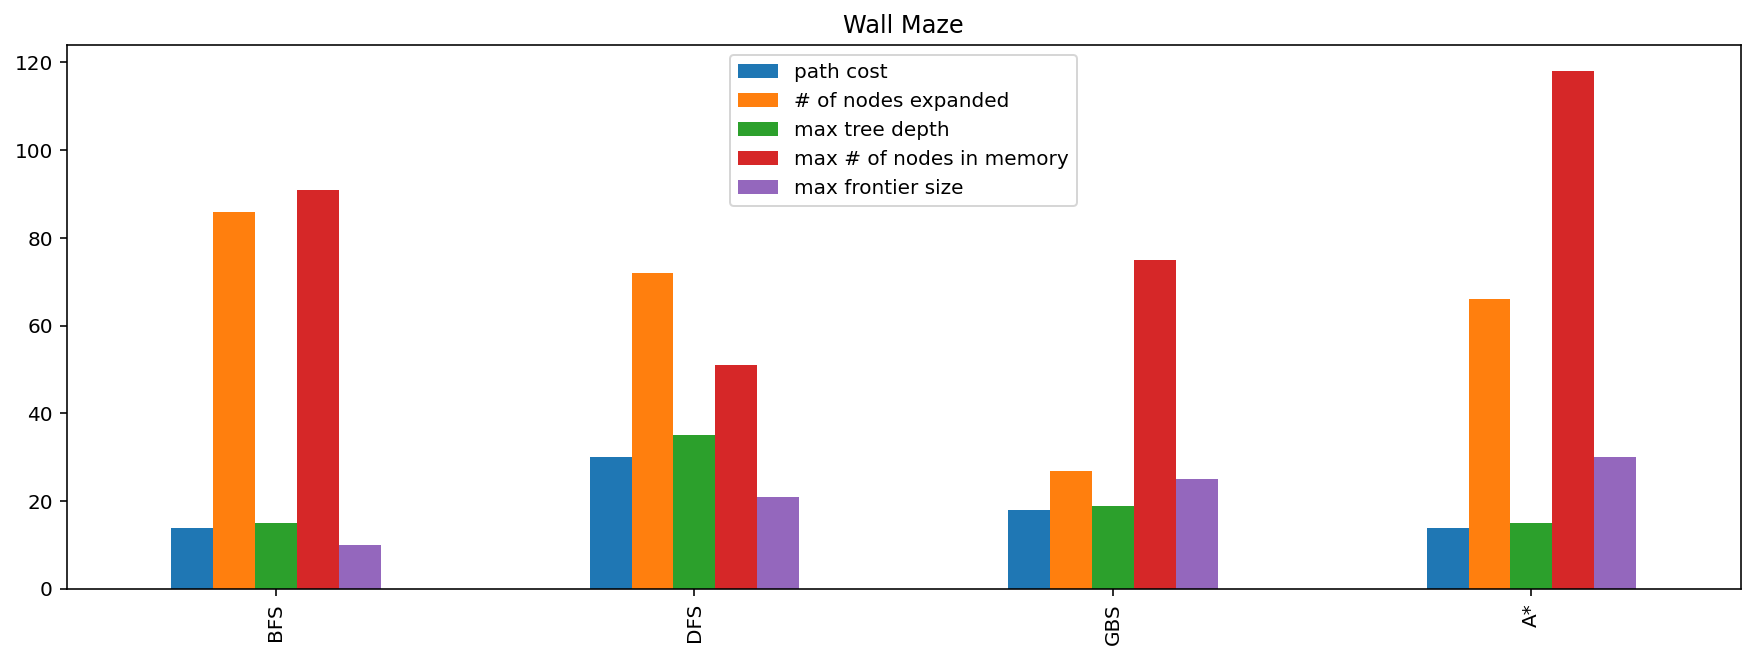

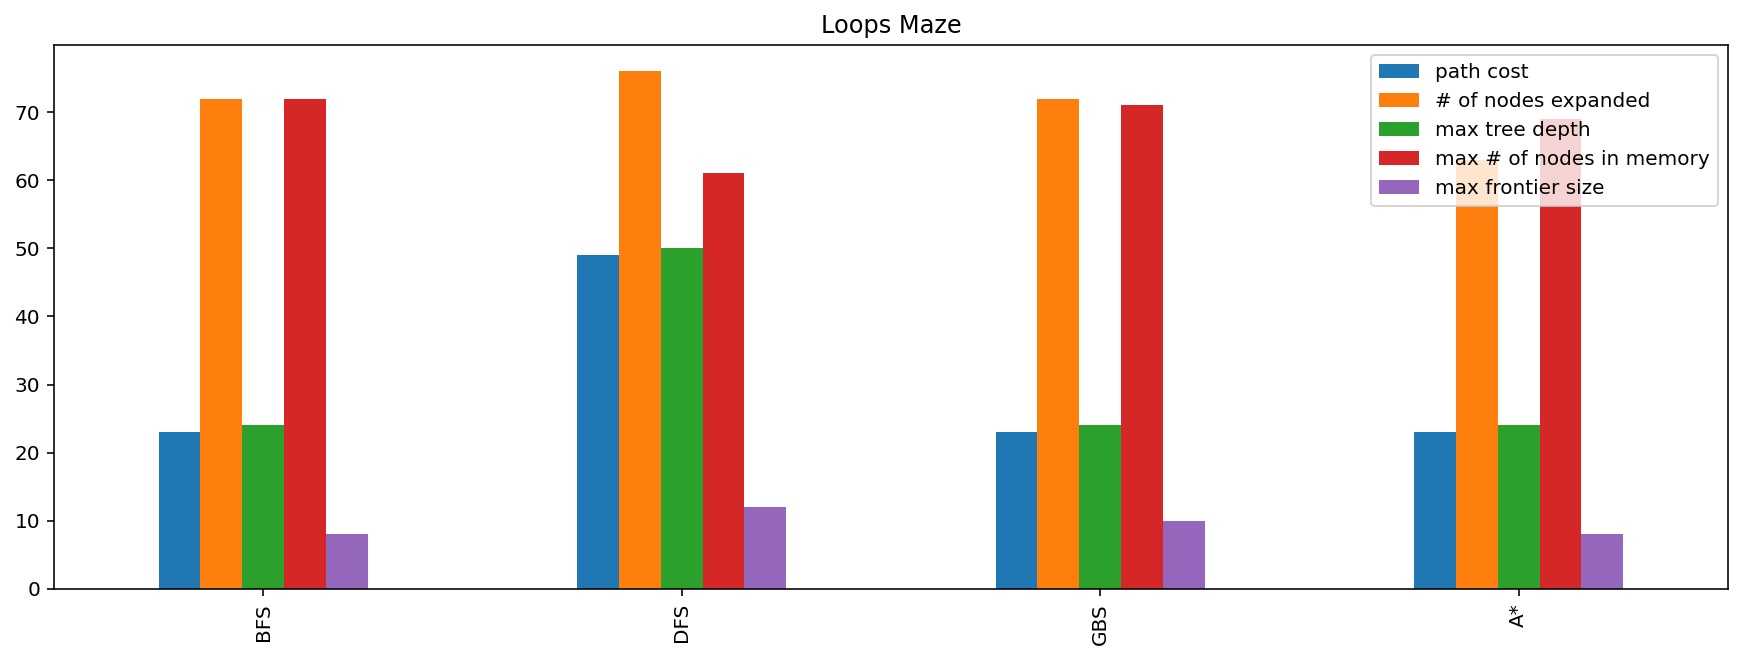

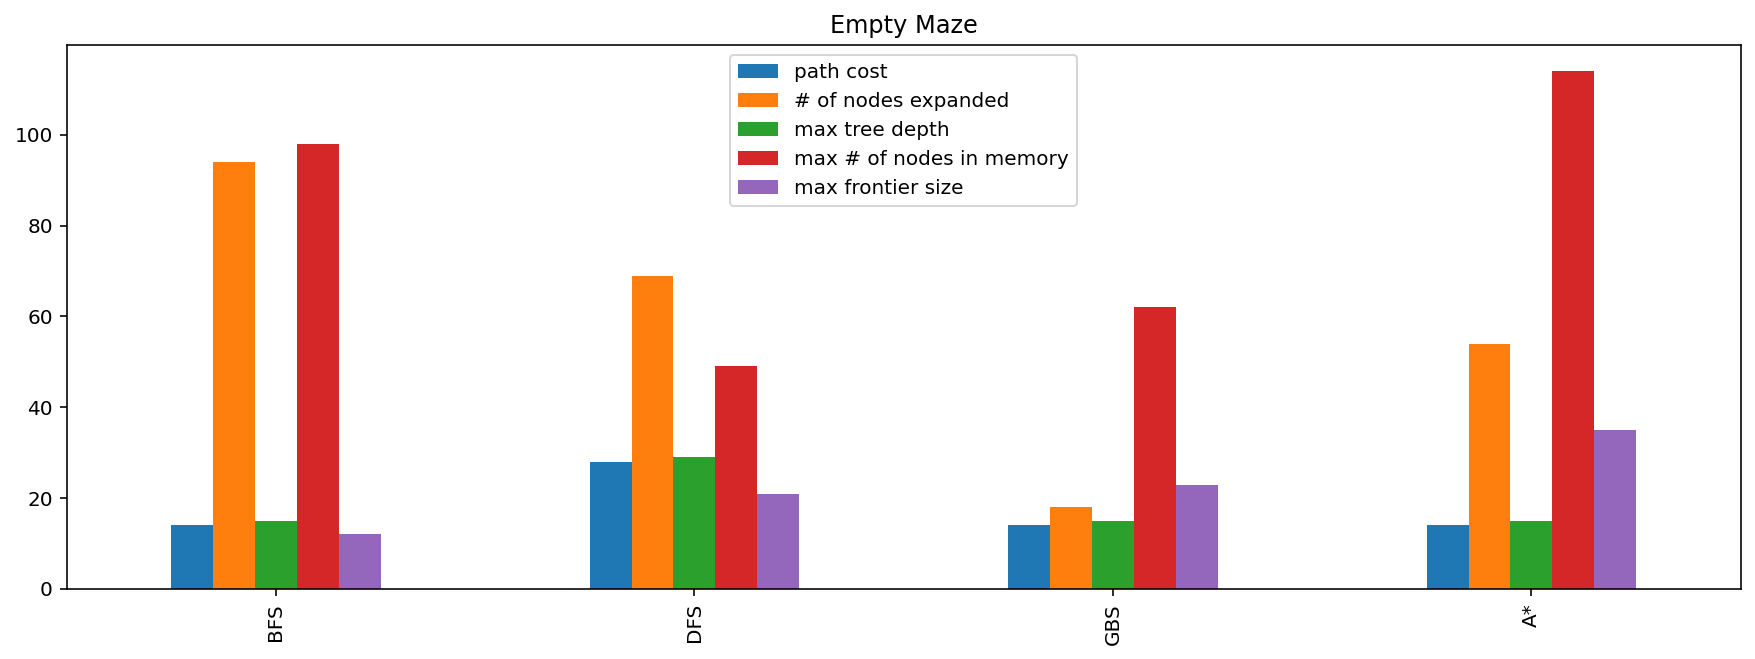

In [14]:
# Add charts
import matplotlib.pyplot as plt

for i in range(7):
    plt.rcParams["figure.figsize"] = (15,5)
    dfss[i].plot.bar()
    plt.title(maze_names[i])

Discuss the most important lessons you have learned from implementing the different search strategies. 

1. The implementations for BFS, GBS and A* are all very similar however their interactions are very different. The only thing that is changed to go from BFS to GBS and A* is changing the frontier to a priority queue and adding a heuristic. 

2. BFS is a very simple algorithm to implement and there are not many edge cases because of how the algorithm is created. Because of its simplicity, it makes it very useful for easy problems like all of the mazes that were given. After looking at the graphs however, it is very obvious that BFS suffers in memory on every single graph compared to the other implementations so for harder problems with much bigger search spaces, BFS will become a problem with memory.

3. Although GBS is not optimal, a lot of the time it still finds the optimal path and if it doesn't, it usually finds a path that is not that much larger than the optimal path. It also uses much less memory than A* so in general, if the optimal path was not needed, but a close enough path was wanted, I would use GBS for both memory and time reasons.

4. DFS is not a very good algorithm. The only way that it is better than the other algorithms is if it randomly gets to the goal without exploring too much space but this is not a frequent occurence, especially in graphs with more intersections or in graphs that have open spaces. There are many edge cases that have to be looked out for when creating DFS and if they aren't then the algorithm will run infinitely or won't find the solution.

## Graduate student advanced task: IDS and Multiple goals [10 Points]

__Undergraduate students:__ This is a bonus task you can attempt if you like [+5 Bonus Points].

Create a few mazes with multiple goals by adding one or two more goals to the medium size maze.
Solve the maze with your implementations for DFS, BFS, and implement in addition IDS (iterative deepening search using DFS). 

Run experiments to show which implementations find the optimal solution and which do not. Discuss why that is the case.

In [15]:
# Your code/answer goes here